In [101]:
#Clustering.

import pandas as pd
import numpy as np
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets._samples_generator import make_blobs

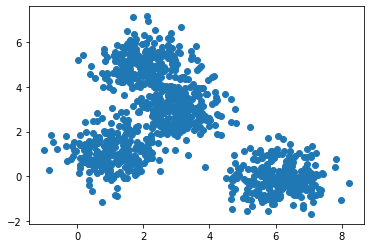

In [102]:
x, y = make_blobs(n_samples = 1000, centers = [[1,1], [2, 5], [3,3], [6, 0]], cluster_std=0.7)
plt.scatter(x[:,0], x[:,1], marker = 'o')

In [103]:
#linkage : {'ward', 'complete', 'average', 'single'}, default='ward' Which linkage criterion to use. The linkage criterion determines 
#which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
#'ward' minimizes the variance of the clusters being merged.
#'average' uses the average of the distances of each observation of the two sets.
#'complete' or 'maximum' linkage uses the maximum distances between all observations of the two sets.
#'single' uses the minimum of the distances between all observations of the two sets.

agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(x, y)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [104]:
agglom

AgglomerativeClustering(linkage='average', n_clusters=4)

In [105]:
x

array([[1.73190834, 0.89781415],
       [3.10123016, 2.00044963],
       [0.83335403, 0.9479239 ],
       ...,
       [0.16261693, 5.41553182],
       [2.87614288, 3.39429156],
       [2.75950008, 1.99533172]])

In [106]:
#Simple method to scale the x values
xmin, xmax = np.min(x, axis = 0), np.max(x, axis = 0)
x1 = (x - xmin)/(xmax - xmin)
x1

array([[0.2965632 , 0.29190786],
       [0.44542686, 0.4165633 ],
       [0.19887829, 0.29757288],
       ...,
       [0.12596016, 0.8026461 ],
       [0.42095685, 0.5741403 ],
       [0.40827621, 0.41598471]])

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
x2 = np.nan_to_num(x)
x3 = StandardScaler().fit_transform(x2)
x3

array([[-0.65460096, -0.65160774],
       [ 0.02342302, -0.11397841],
       [-1.09952293, -0.62717494],
       ...,
       [-1.4316405 ,  1.55116693],
       [-0.08802965,  0.56563903],
       [-0.1457857 , -0.11647383]])

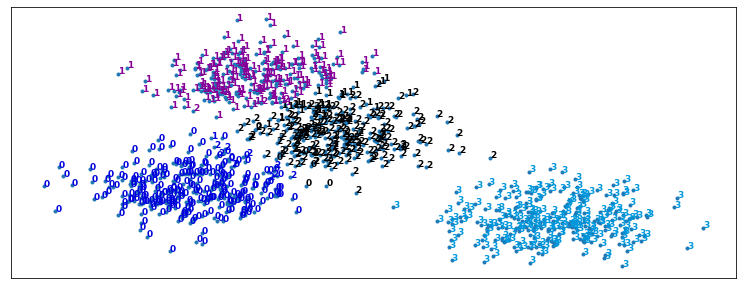

In [109]:
#Plot the blobs
plt.figure(figsize = (13, 5))
xmin, xmax = np.min(x, axis = 0), np.max(x, axis = 0)
x = (x - xmin)/(xmax - xmin)

for i in range(x.shape[0]):
    plt.text(x[i, 0], x[i,1], str(y[i]), color = plt.cm.nipy_spectral(agglom.labels_[i] / 10.), fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])
plt.yticks([])

plt.scatter(x[:,0], x[:,1], marker = '.')
plt.show()


In [110]:
#Calculate a distance matrix, or a matrix of distances between points
dist_matrix = distance_matrix(x, x)
print(dist_matrix)

[[0.         0.19416325 0.09784904 ... 0.53847836 0.30842978 0.16695767]
 [0.19416325 0.         0.27376069 ... 0.50111764 0.15946564 0.03715515]
 [0.09784904 0.27376069 0.         ... 0.51030972 0.35469483 0.24055946]
 ...
 [0.53847836 0.50111764 0.51030972 ... 0.         0.37314601 0.47875816]
 [0.30842978 0.15946564 0.35469483 ... 0.37314601 0.         0.15866313]
 [0.16695767 0.03715515 0.24055946 ... 0.47875816 0.15866313 0.        ]]


In [111]:
#Create hierarchy based on distance matrix
z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Gabri\AppData\Local\Temp/ipykernel_15428/2642424508.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(dist_matrix, 'complete')


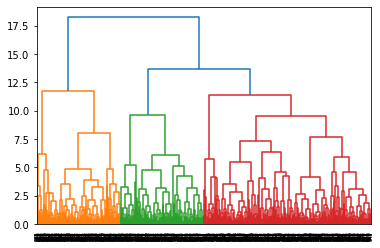

In [112]:
#Create dendrogram based on distance hierarchy
dendro = hierarchy.dendrogram(z)

C:\Users\Gabri\AppData\Local\Temp/ipykernel_15428/3862025947.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(dist_matrix, 'average')


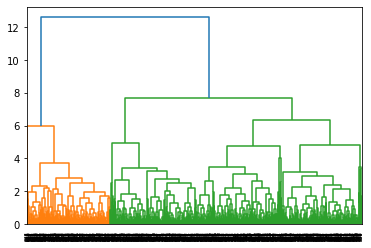

In [113]:
#Dendrogram again, this time using the 'average' method instead of the 'complete' method
z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(z)

In [114]:
#Download a new dataset on cars
!wget -O cars_clus.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv

--2021-10-17 09:02:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: 'cars_clus.csv'

     0K .......... .......                                    100% 1.01M=0.02s

2021-10-17 09:02:17 (1.01 MB/s) - 'cars_clus.csv' saved [17774/17774]



In [115]:
cars = pd.read_csv('cars_clus.csv')
cars.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [116]:
cars.describe()

,partition
count,159.000000
mean,0.012579
std,0.111799
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [117]:
cars.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [118]:
print(cars.size)
cars[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 
'fuel_cap','mpg', 'lnsales', 'partition']] = cars[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 
'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg', 'lnsales', 'partition']].apply(pd.to_numeric, errors = 'coerce')
cars = cars.dropna()
cars = cars.reset_index(drop=True)
print(cars.size)
cars.head()


2544
1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [119]:
features = cars[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg']]

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
#Another method to scale the x values
x = features.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [122]:
#Create distance matrix using scipy. as before

import scipy
leng = feature_mtx.shape[0]
D = np.zeros([leng, leng])
for i in range(leng):
    for j in range(leng):
        D[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

D

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [123]:
import pylab
z = hierarchy.linkage(D, 'complete')

C:\Users\Gabri\AppData\Local\Temp/ipykernel_15428/1282917177.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(D, 'complete')


In [124]:
max_d = 3
clusters = hierarchy.fcluster(z, max_d, criterion = 'distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [125]:
k = 5
clusters = hierarchy.fcluster(z, k, criterion = 'maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

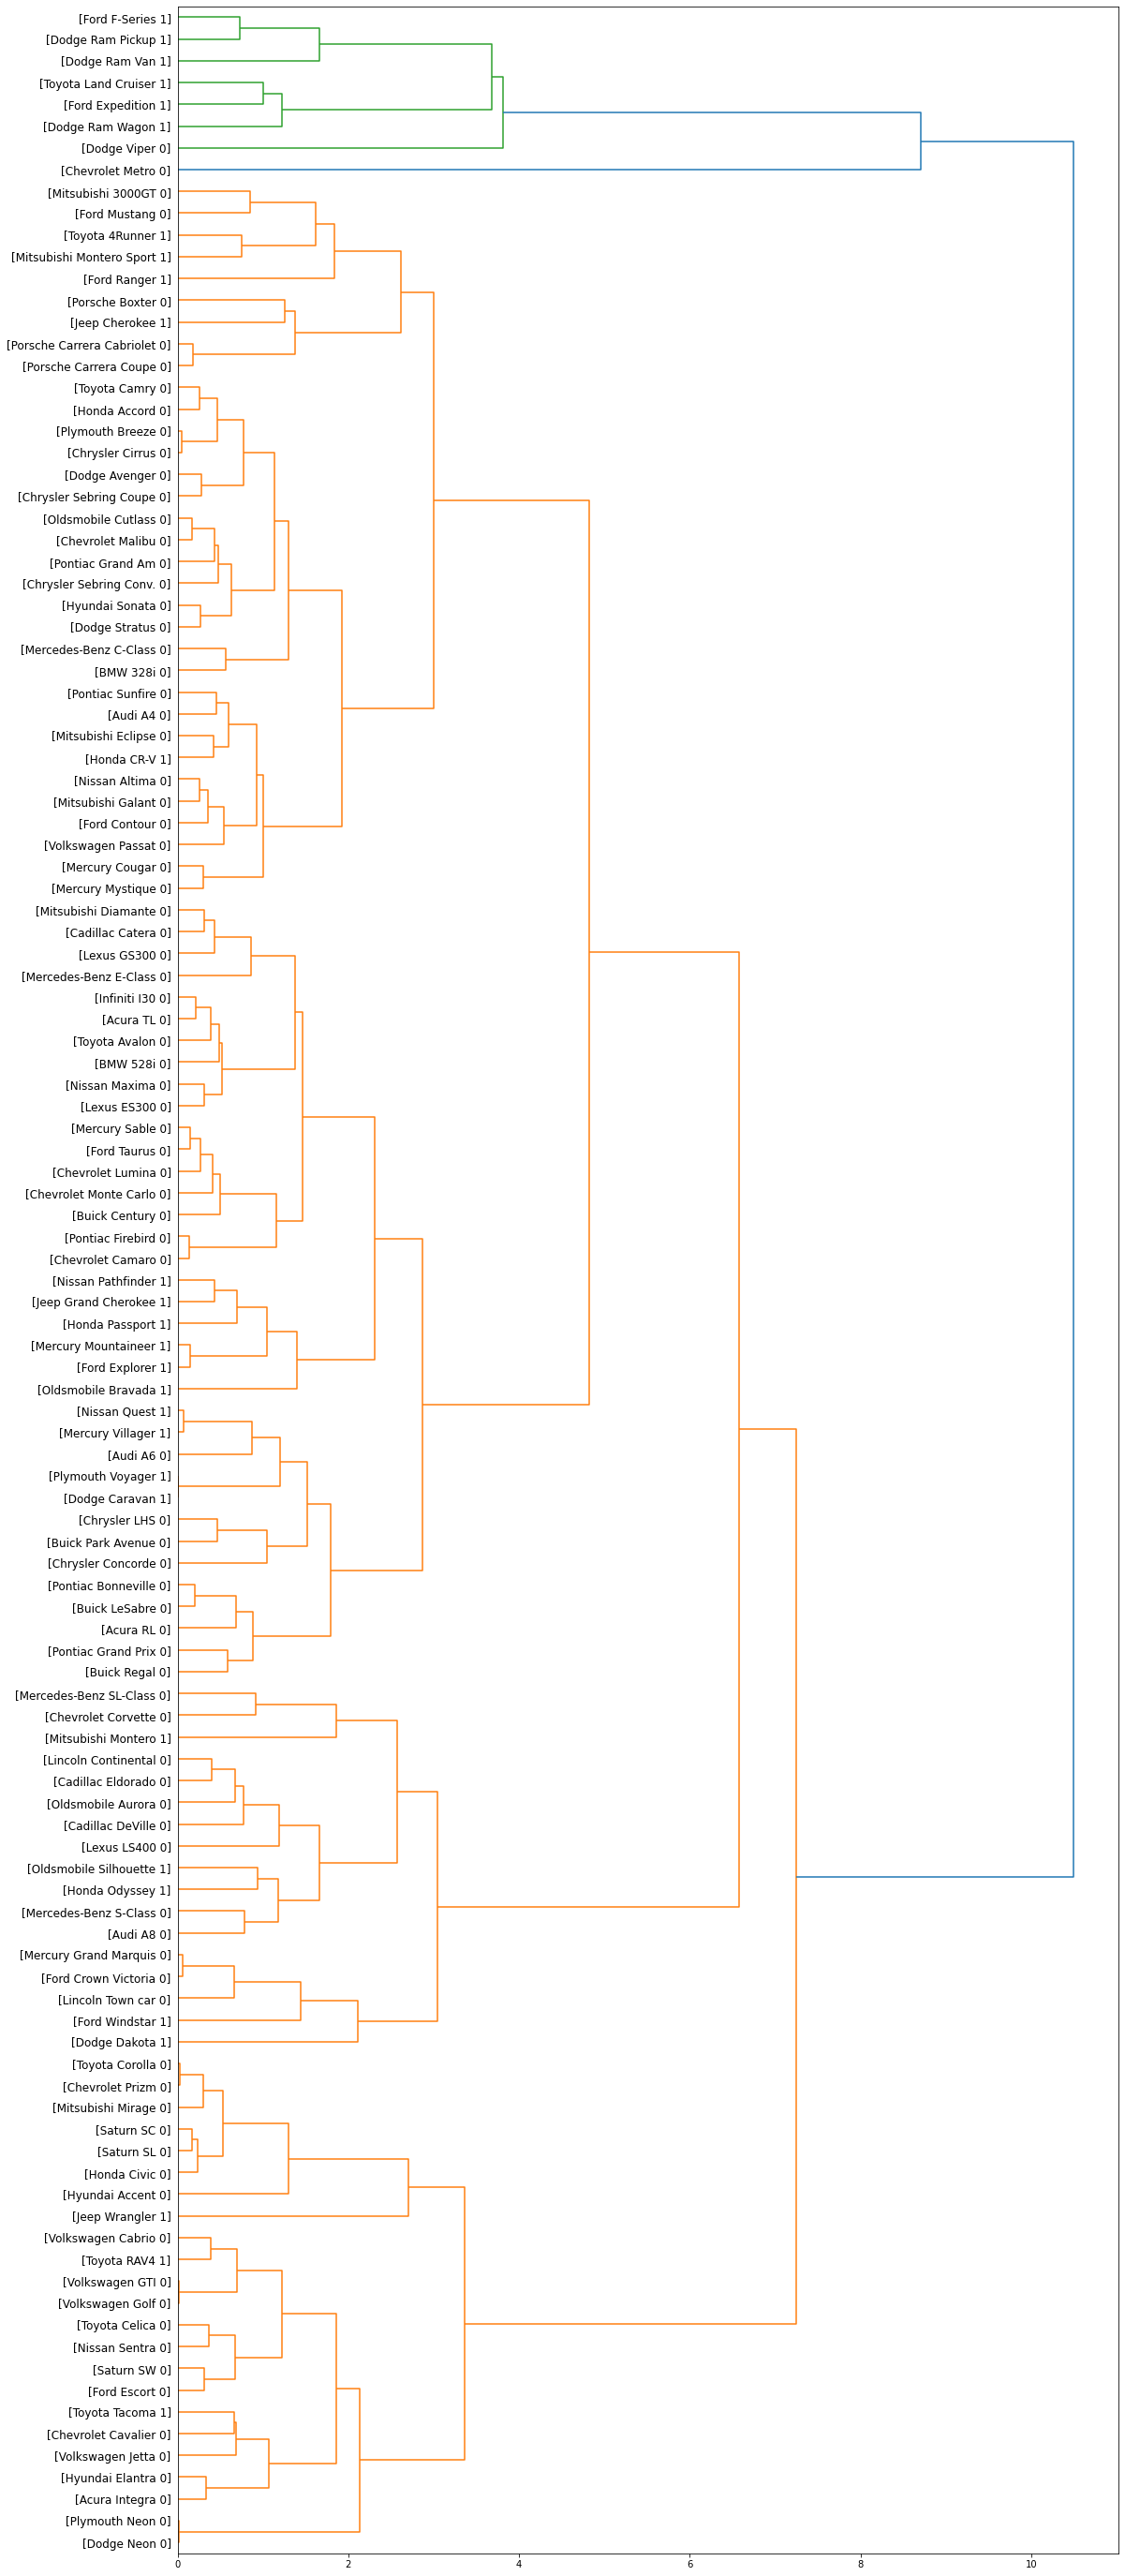

In [126]:
#Create dendrogram

fig = pylab.figure(figsize = (18, 50))
def llf(id):
    return '[%s %s %s]' % (cars['manufact'][id], cars['model'][id], int(float(cars['type'][id])))

dendro = hierarchy.dendrogram(z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation= 'right')


In [129]:
#Create distance matrix using sklearn

from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [130]:
z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Gabri\AppData\Local\Temp/ipykernel_15428/3855052826.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


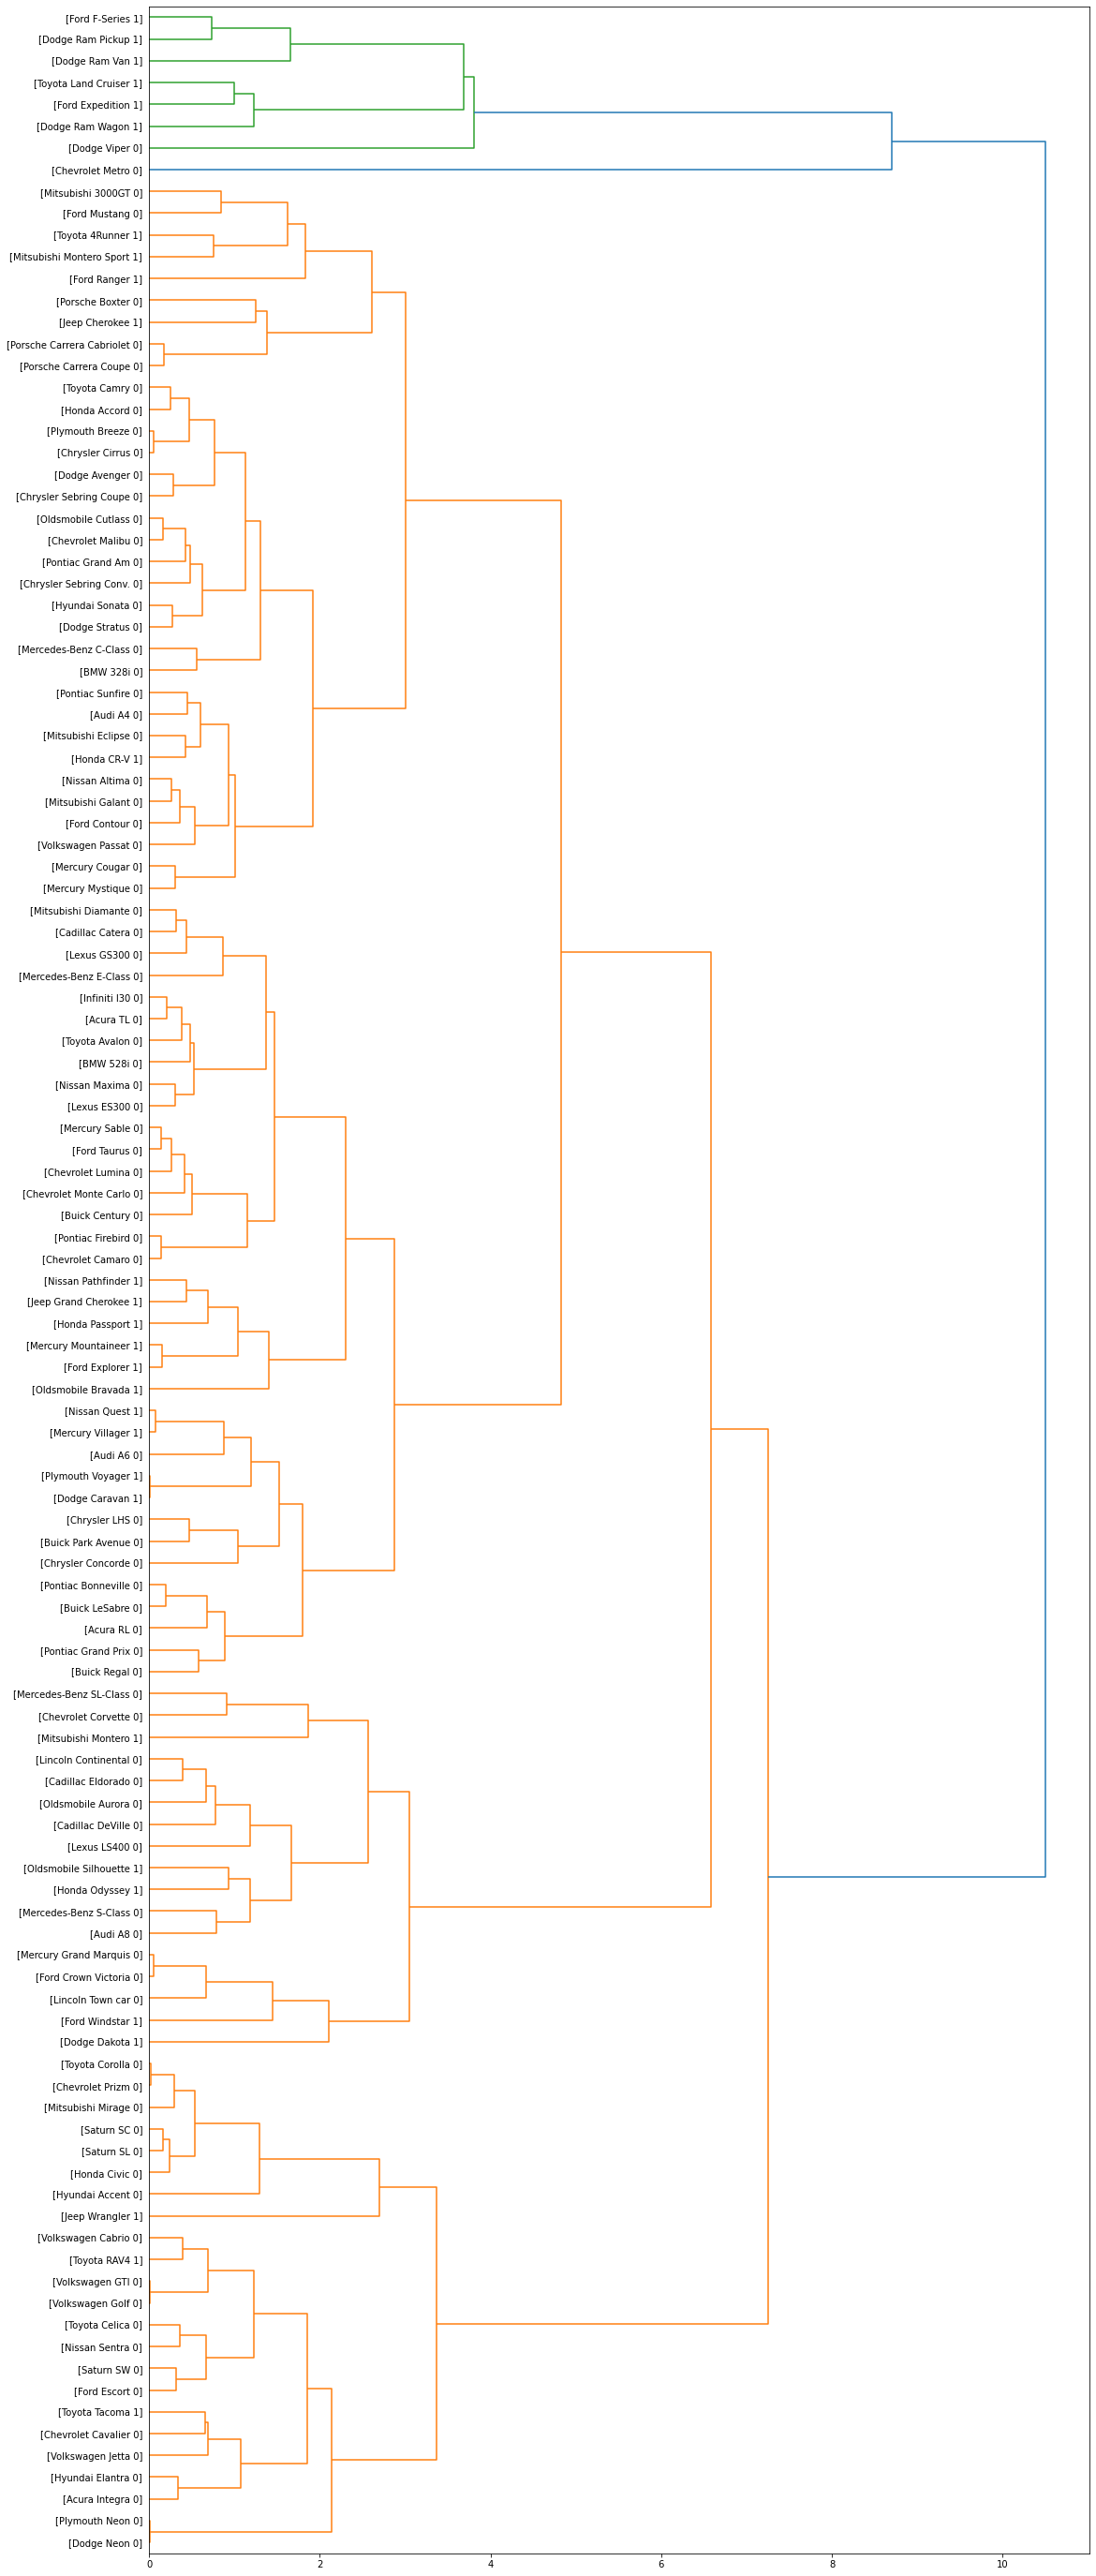

In [133]:
fig = pylab.figure(figsize = (18, 50))
def llf(id):
    return '[%s %s %s]' % (cars['manufact'][id], cars['model'][id], int(float(cars['type'][id])))

dendro = hierarchy.dendrogram(z_using_dist_matrix, leaf_label_func= llf, leaf_rotation=0, leaf_font_size=10, orientation='right')

In [134]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

C:\Users\Gabri\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1], dtype=int64)

In [135]:
cars['cluster'] = agglom.labels_
cars.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


In [140]:
cars.groupby('cluster').mean()

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
cluster,,,,,,,,,,,,,,
0,135.930857,25.027857,0.857143,34.839000,4.985714,245.714286,120.200000,78.114286,203.371429,4.364571,26.500000,16.142857,3.571571,0.0
1,56.946000,10.669348,0.130435,14.234696,1.943478,119.956522,100.043478,67.691304,171.743478,2.569783,13.643478,28.608696,3.637217,0.0
2,54.601111,18.186111,0.277778,27.469778,3.322222,197.611111,109.375000,72.422222,193.494444,3.602528,18.497222,23.133333,3.543278,0.0
3,59.106576,17.784848,0.151515,23.953364,2.600000,166.212121,104.354545,69.493939,183.430303,3.051333,16.627273,24.636364,3.214182,0.0
4,42.167941,26.020000,0.294118,39.914765,4.158824,239.823529,114.147059,74.258824,201.229412,3.939824,21.170588,21.176471,3.092412,0.0
5,21.855000,5.160000,0.000000,9.235000,1.000000,55.000000,93.100000,62.600000,149.400000,1.895000,10.300000,45.000000,3.084000,0.0


In [138]:
cars.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


Text(0, 0.5, 'mpg')

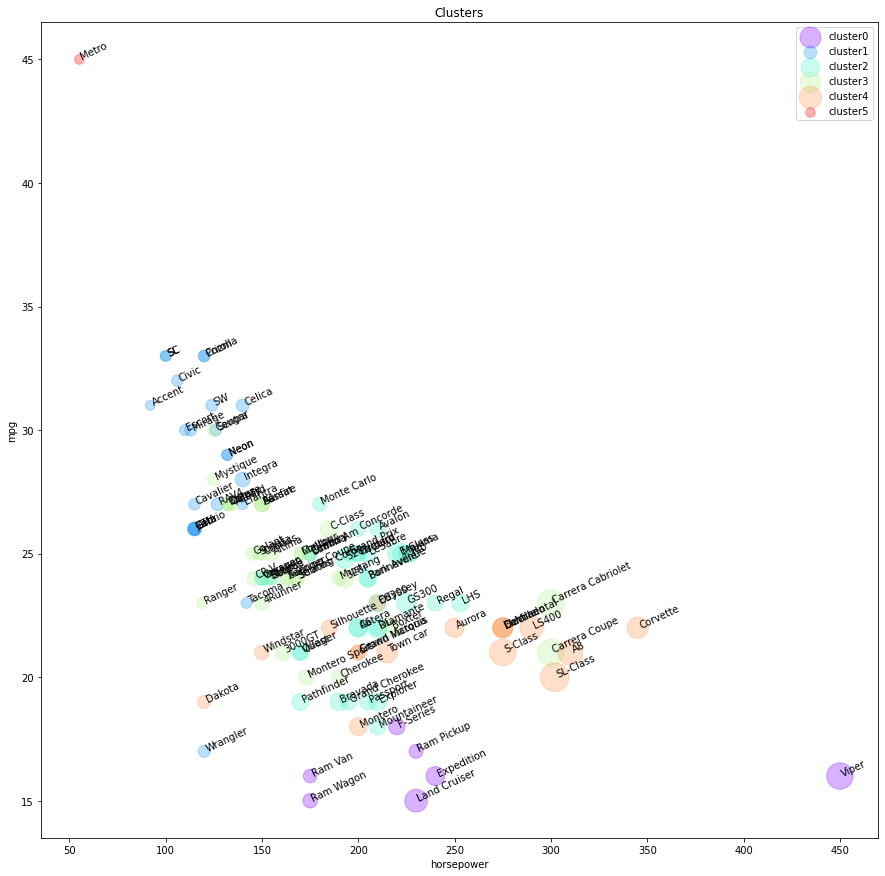

In [179]:
#Plot the clusters on a graph

import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

#Create a new figure
plt.figure(figsize = (15, 15))

for color, label in zip(colors, cluster_labels):
    subset = cars[cars.cluster == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation = 25)
    plt.scatter(subset.horsepow, subset.mpg, s = subset.price*10, color = color, label = 'cluster'+str(label), alpha = 0.3)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepower')
plt.ylabel('mpg')

In [147]:
#Next, set up plotting of the cluster groups, not of the individual cars

cars.groupby(['cluster', 'type'])['cluster'].count()

cluster  type
0        0.0      1
         1.0      6
1        0.0     20
         1.0      3
2        0.0     26
         1.0     10
3        0.0     28
         1.0      5
4        0.0     12
         1.0      5
5        0.0      1
Name: cluster, dtype: int64

In [182]:
agg_cars = cars.groupby(['cluster', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster type                                            
0       0.0   450.000000  8.000000  16.000000  69.725000
        1.0   211.666667  4.483333  16.166667  29.024667
1       0.0   118.500000  1.890000  29.550000  14.226100
        1.0   129.666667  2.300000  22.333333  14.292000
2       0.0   203.615385  3.284615  24.223077  27.988692
        1.0   182.000000  3.420000  20.300000  26.120600
3       0.0   168.107143  2.557143  25.107143  24.693786
        1.0   155.600000  2.840000  22.000000  19.807000
4       0.0   267.666667  4.566667  21.416667  46.417417
        1.0   173.000000  3.180000  20.600000  24.308400
5       0.0    55.000000  1.000000  45.000000   9.235000

In [183]:
subset = agg_cars.loc[(2,),]
for i in subset.index:
    print(i)
    print(subset['horsepow'])

0.0
type
0.0    203.615385
1.0    182.000000
Name: horsepow, dtype: float64
1.0
type
0.0    203.615385
1.0    182.000000
Name: horsepow, dtype: float64


Text(0, 0.5, 'MPG')

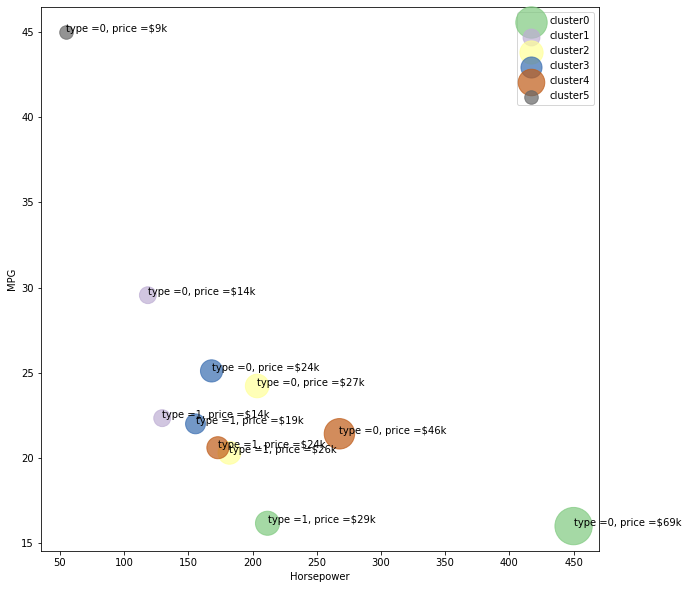

In [184]:
#Now plot the cluster groups

plt.figure(figsize = (10, 10))

colors = cm.Accent(np.linspace(0, 1, n_clusters))


for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0], subset.loc[i][2], str('type ='+str(int(i)) + ', price =$'+str(int(subset.loc[i][3]))+'k'))
    plt.scatter(subset['horsepow'], subset['mpg'], color = color, s = subset['price']*20, label = 'cluster'+str(label), alpha = 0.7)
    #Below line works the same as above line
    #plt.scatter(subset.horsepow, subset.mpg, color = color, s = subset.price*20, label = 'cluster'+str(label), alpha = 0.7)

plt.legend()
plt.xlabel('Horsepower')
plt.ylabel('MPG')